<a href="https://colab.research.google.com/github/alexs-alexs/IA-y-Machine-Learning/blob/main/Modelo_Clasificacion_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 11989 images belonging to 6 classes.
Found 1797 images belonging to 6 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
 46/375 ━━━━━━━━━━━━━━━━━━━━ 31:00 6s/step - accuracy: 0.3862 - loss: 1.8642

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


104/375 ━━━━━━━━━━━━━━━━━━━━ 25:55 6s/step - accuracy: 0.4891 - loss: 1.5543

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6133 - loss: 1.1734

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 2562s 7s/step - accuracy: 0.6135 - loss: 1.1727 - val_accuracy: 0.8286 - val_loss: 0.4970 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 328s 874ms/step - accuracy: 0.7531 - loss: 0.6962 - val_accuracy: 0.8347 - val_loss: 0.4636 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 337s 898ms/step - accuracy: 0.7792 - loss: 0.6136 - val_accuracy: 0.8536 - val_loss: 0.4116 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 379s 889ms/step - accuracy: 0.7823 - loss: 0.5987 - val_accuracy: 0.8559 - val_loss: 0.3986 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 326s 870ms/step - accuracy: 0.8046 - loss: 0.5639 - val_accuracy: 0.8720 - val_loss: 0.3757 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 332s 886ms/step - accuracy: 0.8018 - loss: 0.5543 - val_accuracy: 0.8709 - val_loss: 0.3511 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 324s 862ms/step - accuracy: 0.8132 - 

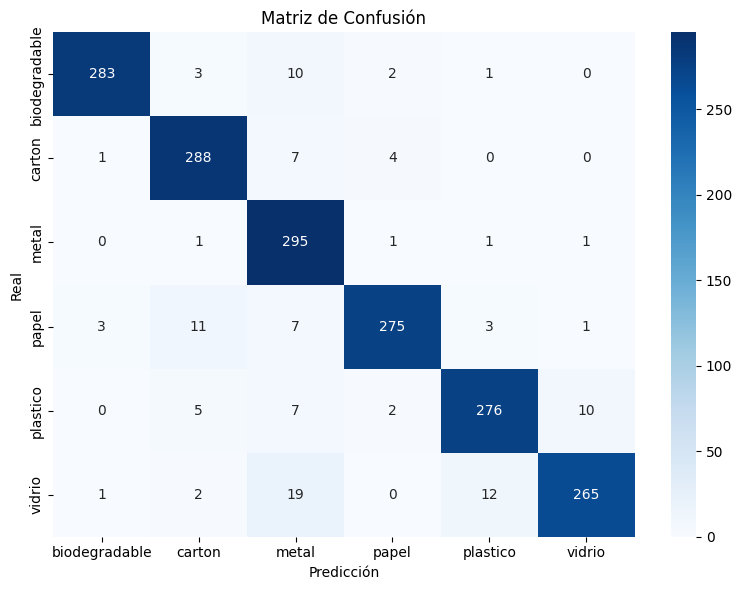

Reporte de clasificación:
               precision    recall  f1-score   support

biodegradable       0.98      0.95      0.96       299
       carton       0.93      0.96      0.94       300
        metal       0.86      0.99      0.92       299
        papel       0.97      0.92      0.94       300
     plastico       0.94      0.92      0.93       300
       vidrio       0.96      0.89      0.92       299

     accuracy                           0.94      1797
    macro avg       0.94      0.94      0.94      1797
 weighted avg       0.94      0.94      0.94      1797



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Parámetros
img_size = (128, 128)
batch_size = 32
num_classes = 6
epochs = 50

# Data augmentation avanzado
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.25,
    shear_range=0.2,
    brightness_range=(0.8, 1.2),
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/upea/IA/dataset/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/upea/IA/dataset/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Transfer learning con MobileNetV2 (sin la última capa)
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Congelamos las capas

# Modelo completo
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=[lr_reduce, early_stop]
)

# Guardar modelo
model.save('modelo_residuos_mobilenet.keras')

# Matriz de confusión
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.tight_layout()  # Asegura que todo se vea bien
plt.savefig("matriz_confusion.png")  # Guarda la imagen
plt.show()  # Opcional: muestra la imagen



# Reporte detallado
print("Reporte de clasificación:")
print(classification_report(y_true, y_pred, target_names=class_names))


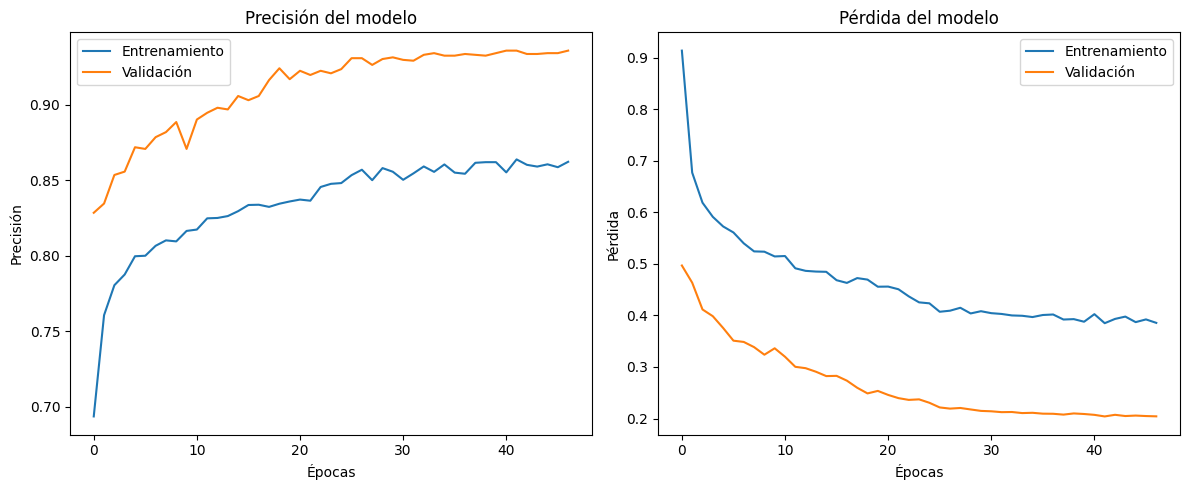

In [ ]:
import matplotlib.pyplot as plt

# Extraer datos del historial
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Crear figura
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Entrenamiento')
plt.plot(epochs_range, val_acc, label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Entrenamiento')
plt.plot(epochs_range, val_loss, label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.savefig("graficas_entrenamiento.png")  # Guarda la figura
plt.show()


<ipython-input-3-3180ac45a76f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_filtered.index, y=df_filtered['f1-score'], palette='viridis')


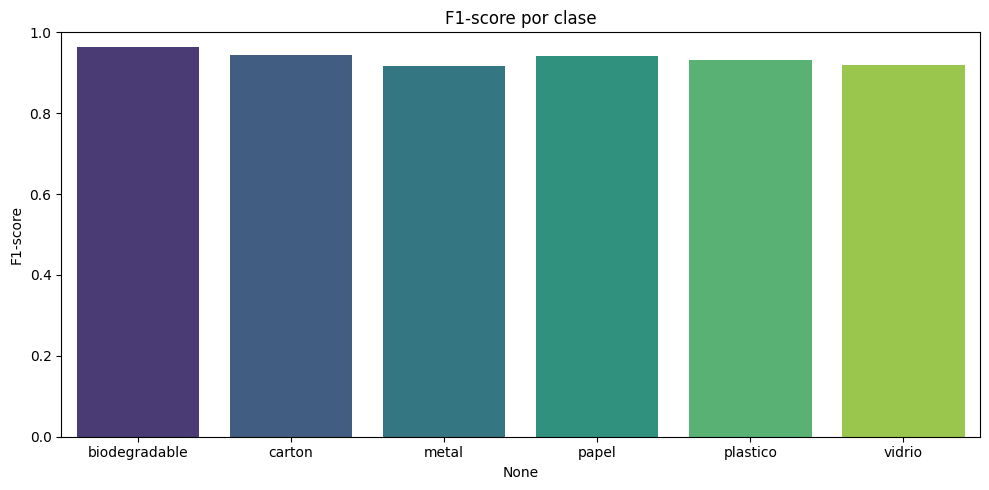

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener el reporte en forma de diccionario
report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
df = pd.DataFrame(report_dict).transpose()

# Tomamos solo las clases (evita accuracy y avg)
df_filtered = df.iloc[:len(class_names)]

plt.figure(figsize=(10, 5))
sns.barplot(x=df_filtered.index, y=df_filtered['f1-score'], palette='viridis')
plt.title("F1-score por clase")
plt.ylabel("F1-score")
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("f1_score_por_clase.png")
plt.show()
